<a href="https://colab.research.google.com/github/suddhasheel333/Sentiment-Analysis/blob/main/Chennai_housing_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('chennai.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,object
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [ ]:
data.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [ ]:
data.shape

(7109, 22)

In [ ]:
data['N_BEDROOM'].value_counts()

,count
N_BEDROOM,
1.0,3795
2.0,2352
3.0,707
4.0,254


<Axes: >

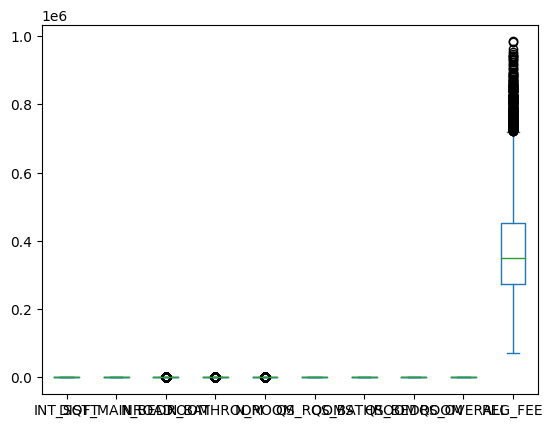

In [ ]:
data[data.drop(['SALES_PRICE','COMMIS'],axis=1).columns].plot.box()

In [ ]:
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0],inplace=True)
data['N_BEDROOM'].mode()[0]

<ipython-input-12-549c44cf967a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0],inplace=True)


1.0

In [ ]:
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0],inplace=True)
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean(),inplace=True)
data.isnull().sum()

<ipython-input-13-810ae7b9607e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0],inplace=True)
<ipython-input-13-810ae7b9607e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,0
N_BATHROOM,0
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


<Axes: >

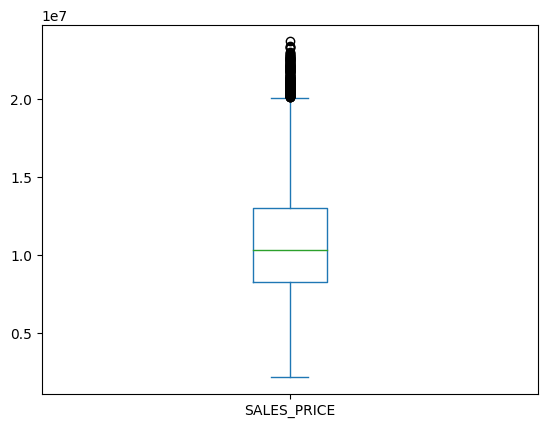

In [ ]:
data['SALES_PRICE'].plot.box()

<Axes: >

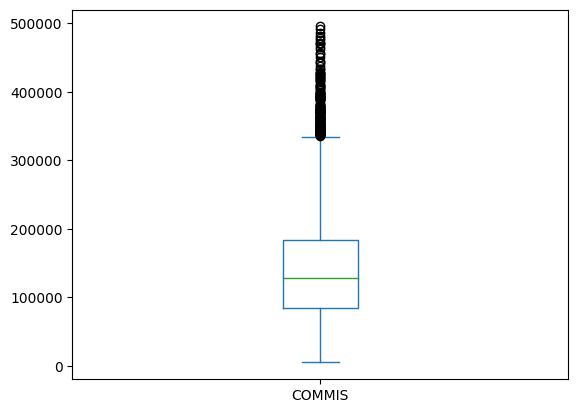

In [ ]:
data['COMMIS'].plot.box()

In [ ]:
data.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109,7109.000000,7109.000000,7109.000000,7109.000000,7109,7109,...,7109,7109,7109,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,2798,NaN,NaN,NaN,NaN,9,3,...,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P03210,Chrompet,NaN,06-10-2009,NaN,NaN,NaN,NaN,AdjLand,Yes,...,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,12,NaN,NaN,NaN,NaN,1433,3587,...,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,NaN,99.603179,1.636939,1.213110,3.688704,NaN,NaN,...,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,NaN,57.403110,0.802881,0.409534,1.019099,NaN,NaN,...,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,NaN,0.000000,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,NaN,50.000000,1.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,NaN,99.000000,1.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,NaN,148.000000,2.000000,1.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07


In [ ]:
data.nunique()

,0
PRT_ID,7109
AREA,17
INT_SQFT,1699
DATE_SALE,2798
DIST_MAINROAD,201
N_BEDROOM,4
N_BATHROOM,2
N_ROOM,5
SALE_COND,9
PARK_FACIL,3


<Axes: xlabel='UTILITY_AVAIL'>

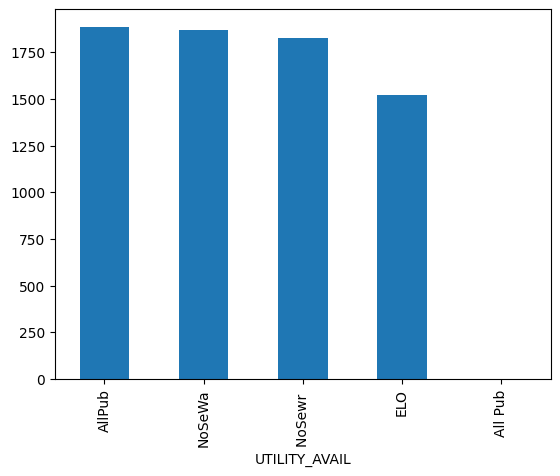

In [ ]:
data['UTILITY_AVAIL'].value_counts().plot(kind = 'bar')

In [ ]:
data.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
data['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
data['PARK_FACIL'].value_counts()

<ipython-input-20-ba724544aa4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)


,count
PARK_FACIL,
Yes,3587
No,3522


In [ ]:
data['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'},inplace= True)
data['AREA'].value_counts()

<ipython-input-21-cb479868ecd9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',


,count
AREA,
Chrompet,1702
Karapakkam,1366
KK Nagar,997
Velachery,981
Anna Nagar,788
Adyar,774
T Nagar,501


In [ ]:
data['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial',
                         'Adj Land': 'AdjLand',
                         'Ab Normal': 'AbNormal'}, inplace = True)
data['SALE_COND'].value_counts()

<ipython-input-22-3d0995b50db3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial',


,count
SALE_COND,
AdjLand,1439
Partial,1433
Normal Sale,1423
AbNormal,1411
Family,1403


In [ ]:
data['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
data['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

<ipython-input-23-e850c1e6d235>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
<ipython-input-23-e850c1e6d235>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

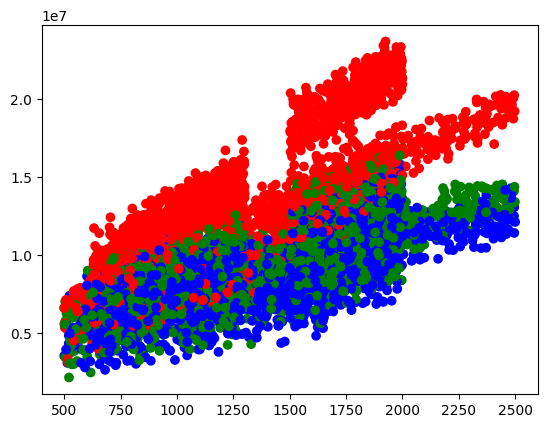

In [ ]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(data['INT_SQFT'], data['SALES_PRICE'], c=data['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# sale price of houses wrt number of bedrooms and bathroomms
data.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')


N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


In [ ]:
# SALE PRICE based on building type

data.groupby('BUILDTYPE').SALES_PRICE.median()

,SALES_PRICE
BUILDTYPE,
Commercial,13356200.0
House,8985370.0
Others,9637260.0


<Axes: ylabel='Frequency'>

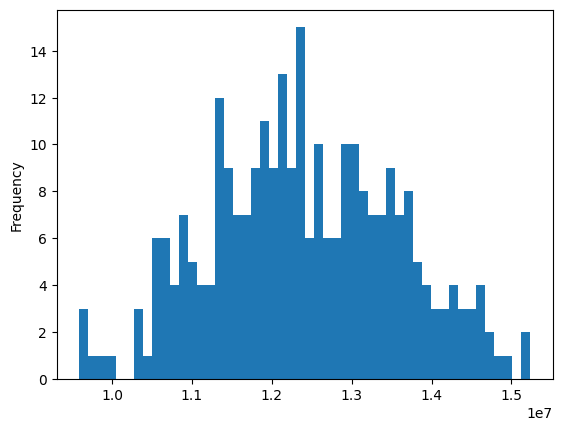

In [ ]:
temp_df = data.loc[(data['BUILDTYPE']=='House')&(data['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [ ]:
data.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,object
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [ ]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,object
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [ ]:
data.to_csv('data_cleaned_chennai_housing.csv')

In [ ]:
# segregating depen. and indep. vars

x=data.drop(['SALES_PRICE'],axis=1)
y=data['SALES_PRICE']
x.shape,y.shape

((7109, 21), (7109,))

               INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  QS_ROOMS  \
INT_SQFT       1.000000       0.002022   0.786263    0.515290  0.019850   
DIST_MAINROAD  0.002022       1.000000  -0.002723    0.001850  0.002237   
N_BEDROOM      0.786263      -0.002723   1.000000    0.755207  0.014948   
N_BATHROOM     0.515290       0.001850   0.755207    1.000000  0.013376   
QS_ROOMS       0.019850       0.002237   0.014948    0.013376  1.000000   
QS_BATHROOM   -0.008337      -0.029468  -0.007534   -0.012043  0.008828   
QS_BEDROOM     0.008865       0.001554   0.015752    0.013191  0.007789   
QS_OVERALL     0.013989      -0.017255   0.014245    0.007961  0.516147   
REG_FEE        0.657544       0.011600   0.455380    0.260244  0.019739   
COMMIS         0.571076       0.010994   0.430446    0.256726  0.009377   
SALES_PRICE    0.612125       0.018783   0.330987    0.108834  0.021967   

               QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE    COMMIS  \
INT_SQFT         -0.00833

<Axes: >

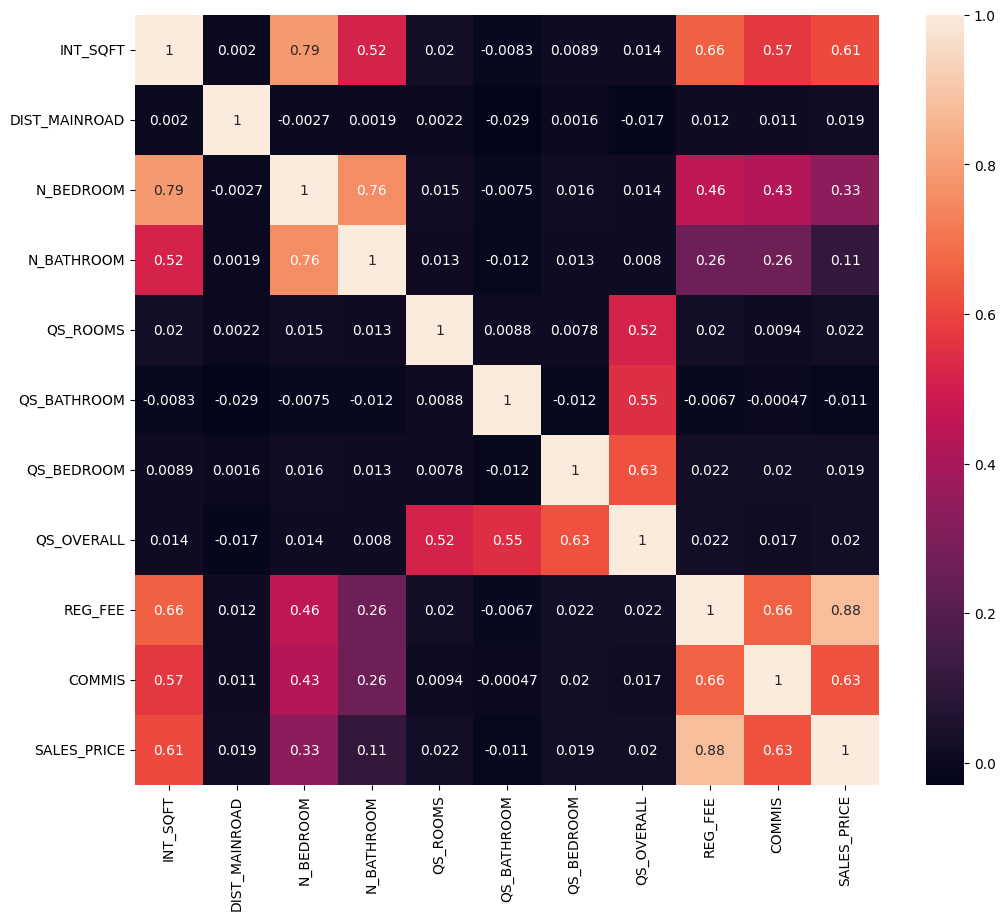

In [ ]:
numerical_col=['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE']
corr = data[numerical_col].corr()
print(corr)

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True,)

In [ ]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=56)
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_log_error as MSLE
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5331, 21)
(1778, 21)
(5331,)
(1778,)


In [ ]:
data=pd.read_csv('chennai.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# Define the features (X) and target (y)
X = data[['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS']]  # Independent variables
y = data['SALES_PRICE']  # Dependent variable (housing price)

# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer # import the SimpleImputer class
imputer = SimpleImputer(strategy='mean') # replace missing values with the mean

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model on the imputed training data
model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
# Use the same imputer that you fit in cell 44 to transform X_test
y_pred = model.predict(imputer.transform(X_test))

# Calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error # import the function
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the model coefficients (optional)
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 2637803750113.5835
Intercept: 2336383.7930109203
Coefficients: [ 2.08966051e+03  4.18388960e+02 -7.49927782e+05 -1.09418333e+06
 -4.66066660e+04 -1.06591002e+05 -7.57479558e+04  2.51833539e+05
  2.01785199e+01  3.58660784e+00]


In [ ]:
# Predicting price for a house
# Providing all 10 features
predicted_price = model.predict([[1500, 5, 3, 2, 3, 4, 3, 3.5, 450000, 15000]])
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 10256939.080574213
